# **Задача классификации. Метод k ближайших соседей (kNN)**

Начало - урок 4.2.2.

In [ ]:
from google.colab import drive    #подключаю гугл-диск 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns   
from sklearn.neighbors import KNeighborsClassifier    #подключаю библиотеку, кот-я занимается методом К-ближайших соседей

Этот набор данных изначально получен из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое **предсказание наличия у пациента диабета** на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из большей базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения пима.

Из набора данных в файле (.csv) мы можем найти несколько переменных, некоторые из них являются независимыми (несколько переменных медицинских предикторов) и только одна целевая зависимая переменная (**Outcome**).

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_control.csv', delimiter = ',')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


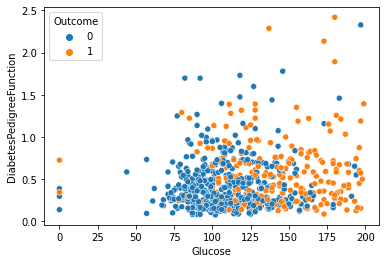

In [ ]:
df_cut = df[['Glucose', 'DiabetesPedigreeFunction', 'Outcome']] #Outcome - целевой признак
df_cut = df_cut.dropna() #проверила через df.info(): в этом датасете нет пропусков в данных, но пусть будет для последующего копипаста
sns.scatterplot(
    data = df_cut,
    x = 'Glucose',
    y = 'DiabetesPedigreeFunction',
    hue = 'Outcome')

In [ ]:
from sklearn.preprocessing import StandardScaler    #стандартный нормировщик
scaler = StandardScaler()
scaler.fit(df_cut[['Glucose', 'DiabetesPedigreeFunction']].values.reshape(-1,2)) #обучаем нормировщик нашим данным, показываем ему, какой масштаб они имеют
arr = scaler.transform(df_cut[['Glucose', 'DiabetesPedigreeFunction']].values.reshape(-1,2)) #а вот уже функция transform их нормирует
#теперь наши данные имеют единый масштаб

In [ ]:
arr

array([[ 0.85517899,  0.4387335 ],
       [-1.09726242, -0.37031249],
       [ 1.93986866,  0.57064317],
       ...,
       [-0.26050182, -0.76311018],
       [ 0.76220559, -0.71034631],
       [-0.29149295, -0.98589096]])

In [ ]:
#создаем модель иск.интеллекта, применяющую метод К-ближ.соседей
model = KNeighborsClassifier(n_neighbors=3)   #n_neighbors=3 это сколько соседей мы рассматриваем для принятия решения 
model.fit(arr,                                #загружаем тренировочную выборку (после нормировки наша тренировочная выборка имеет имя arr)  
          y = df_cut['Outcome'].values)       #в качестве точных ответов загружаем сюда дигнозы - объекты из тренировочной выборки
#теперь наша модель ИИ натренирована

KNeighborsClassifier(n_neighbors=3)

**Загружаем тестовую выборку для оценки качества ее работы:**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_test.csv', delimiter = ',')
df_test_cut = df_test[['Glucose', 'DiabetesPedigreeFunction', 'Outcome']]
df_test_cut = df_test_cut.dropna()

#отнормируем таблицу, т.к. метод KNN работает с нормированными данными
arr_test = scaler.transform(df_test_cut[['Glucose', 'DiabetesPedigreeFunction']].values.reshape(-1,2))

In [ ]:
#внимание: прогоняем объекты тестовой выборки через функцию predict нашей модели
df_test_cut['Predicted'] = model.predict(arr_test)

In [ ]:
#строим матрицу сопряженностей (матрицу ошибок)
pd.crosstab(df_test_cut['Predicted'], df_test_cut['Outcome'])

Outcome,0,1
Predicted,,
0,52,14
1,11,23


In [ ]:
df_test_cut['Code'] = '0'    #добавим столбец, значение кот-го =0, если модель НЕ ошиблась
df_test_cut.loc[(df_test_cut['Outcome'] == 0) & (df_test_cut['Predicted'] == 1), 'Code'] = '1'  #=1, если истинное значение 0, а предсказана 1
df_test_cut.loc[(df_test_cut['Outcome'] == 1) & (df_test_cut['Predicted'] == 0), 'Code'] = '2'  #=2, если истинное значение 1, а предсказан 0

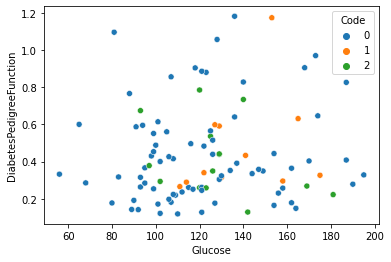

In [ ]:
sns.scatterplot(data = df_test_cut,
                x = 'Glucose',
                y = 'DiabetesPedigreeFunction',
                hue = 'Code',
                )
#график показывает, где модель отработала верно, а где ошиблась (точки трёх цветов)

**Метрики качества задачи классификации:**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
print(accuracy_score(df_test_cut['Predicted'], df_test_cut['Outcome']))
#это процент правильно классифицированных объектов

0.75


***Свой оптимальный результат (75% правильно классифицированных объектов) эта модель дает при количестве соседей = 3. Также этот результат метода ближайших соседей превосходит результат метода SGDClassifier (линейного классификатора).***

In [ ]:
print(precision_score(df_test_cut['Predicted'], df_test_cut['Outcome'], average = None, zero_division = 1))
print(recall_score(df_test_cut['Predicted'], df_test_cut['Outcome'], average = None, zero_division = 1))

[0.82539683 0.62162162]
[0.78787879 0.67647059]
